## create a GeoArray instance from a file on disk

In [42]:
from geoarray import GeoArray

gA = GeoArray('path/to/your/image_file.bsq')  # all GDAL compatible file formats are accepted


## OR create a GeoArray instance from a numpy array

In [19]:
from geoarray import GeoArray
import numpy as np

testarray = np.random.randint(1,10, (250, 250, 8))

gA = GeoArray(testarray,
              geotransform=[640605.0, 30.0, -0.0, 5754285.0, -0.0, -30.0], 
              projection='PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]')

## get some relevant metadata directly from the attributes of the GeoArray instance

In [4]:
gA.shape

(250, 250, 8)

In [5]:
gA.geotransform

[640605.0, 30.0, -0.0, 5754285.0, -0.0, -30.0]

In [6]:
gA.projection

'PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'

In [7]:
gA.metadata

Metadata: 

{'band_names': ['Band 1',
                'Band 2',
                'Band 3',
                'Band 4',
                'Band 5',
                'Band 6',
                'Band 7',
                'Band 8'],
 'description': '/home/gfz-fe/scheffler/temp/Landsat-8__OLI_TIRS__LC81940242014072LGN00_L2B__250x250.bsq',
 'map_info': 'UTM, 1, 1, 640605, 5754285, 30, 30, 32, North,WGS-84'}

In [8]:
gA.box.boxMapXY

((640605.0, 5754285.0),
 (648105.0, 5754285.0),
 (648105.0, 5746785.0),
 (640605.0, 5746785.0))

## index the GeoArray instance just like a numpy array

In [9]:
gA[:10, :10, 0]

array([[1465, 1473, 1501, 1485, 1494, 1496, 1480, 1494, 1459, 1440],
       [1421, 1448, 1469, 1467, 1476, 1470, 1495, 1515, 1487, 1474],
       [1402, 1408, 1399, 1397, 1417, 1420, 1439, 1439, 1443, 1464],
       [1419, 1407, 1394, 1398, 1421, 1406, 1392, 1402, 1430, 1435],
       [1415, 1409, 1405, 1414, 1415, 1403, 1395, 1413, 1426, 1424],
       [1414, 1411, 1412, 1410, 1416, 1411, 1409, 1416, 1416, 1425],
       [1415, 1426, 1433, 1433, 1430, 1424, 1413, 1419, 1429, 1438],
       [1434, 1445, 1450, 1437, 1439, 1436, 1427, 1417, 1437, 1454],
       [1441, 1437, 1442, 1435, 1425, 1439, 1436, 1417, 1433, 1431],
       [1418, 1435, 1437, 1439, 1437, 1433, 1427, 1413, 1415, 1405]], dtype=int16)

## visualize the data

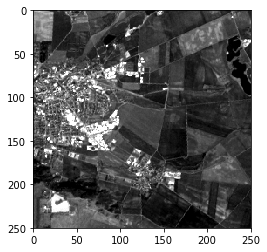

In [15]:
# non-interactively:
gA.show()

In [ ]:
# interactively (adds a slider for the band to be visualized)
gA.show(interactive=True)

Output can not be rendered here.

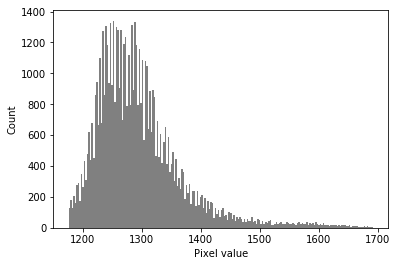

STD: 103.690543564
MEAN: 1301.152864
2 % percentile: 1186.0
98 % percentile: 1585.0


In [13]:
gA.show_histogram(band=0)

In [ ]:
gA.show_footprint()

Output shows a map with the footprint polygon inside (can not be rendered here).

## use some geo functions

### subsetting

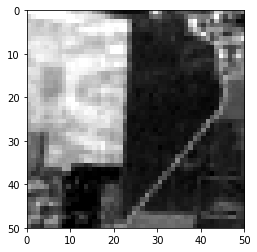

In [52]:
gA_subset = gA.get_subset(xslice=slice(0,50), yslice=slice(0,50), zslice=slice(0,2))  # return a subset GeoArray instance of the upper left corner (first 2 bands)

gA_subset.show()

### get a geographic position

In [30]:
gA.box.boundsMap

(640605.0, 648105.0, 5746785.0, 5754285.0)

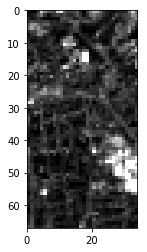

In [51]:
# define target bounds
xmin=641000.0
ymin=5750000.0
xmax=642000.0
ymax=5752000

nparr, gt, prj = gA.get_mapPos(mapBounds=(xmin, ymin, xmax, ymax), mapBounds_prj=gA.projection)

gA_map_subset = GeoArray(nparr, geotransform=gt, projection=prj)

gA_map_subset.show()

### warp the GeoArray

In [37]:
gA_map_subset.epsg  # EPSG code so far

32632

In [53]:
gA_map_subset.reproject_to_new_grid(tgt_prj=32631,  # EPSG code of target projection (also takes WKT strings, etc.)
                                    tgt_xygrid=[[0,30], [30, 0]]  # characteristics of target pixel grid (defines pixel origin and pixel size)
                                   )

Warping progress     |==================================================| 100.0% Complete  => 0:00:00


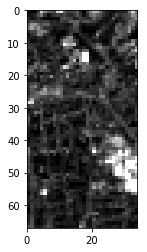

In [49]:
gA_map_subset.show()